# Entrenamiento de una red neuronal para la prediccion de una planta de segundo orden

El objetivo es crear un modelo de basado en una red neuronal que sea capaz de replicar el comportamiento de una planta de segundo orden.
La intención es que encuentre una correlación entre dos datos de entrada, distintas entradas a la planta y el tiempo; con respecto a la salida de la planta original.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


seed = 7
np.random.seed(seed)

# Cargar el dataset de planta.csv
dataset = np.loadtxt("planta.csv",delimiter=",")

In [2]:
dataset.shape

(50, 100)

In [3]:
tiempo = [i for i in range(0,100)]
x = np.array(tiempo)
y = dataset[1,:]

In [4]:
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [5]:
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [16]:
model = Sequential()
model.add(Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(75, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='uniform'))

In [17]:
model.compile(loss = 'mse', optimizer='adam')

In [18]:
model.fit(x, y, epochs=1000, batch_size=50, verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1317
Epoch 2/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1236
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1160
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1084
Epoch 5/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.1007
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0926
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0844
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0685
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0603
Epoch 11/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0529
Epoch 12/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 13/1000
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 104/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 105/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 106/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 107/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 108/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 109/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 110/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 111/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 112/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 113/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 114/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 115/1000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 4.0281e-04
Epoch 201/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.0186e-04
Epoch 202/1000
2/2 [==============================] - 0s 5ms/step - loss: 3.9826e-04
Epoch 203/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9690e-04
Epoch 204/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9525e-04
Epoch 205/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9556e-04
Epoch 206/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8987e-04
Epoch 207/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8872e-04
Epoch 208/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8780e-04
Epoch 209/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8606e-04
Epoch 210/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8291e-04
Epoch 211/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.7890

2/2 [==============================] - 0s 2ms/step - loss: 1.9749e-04
Epoch 297/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9601e-04
Epoch 298/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9686e-04
Epoch 299/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9483e-04
Epoch 300/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9457e-04
Epoch 301/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9615e-04
Epoch 302/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9212e-04
Epoch 303/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9153e-04
Epoch 304/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9671e-04
Epoch 305/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9343e-04
Epoch 306/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9071e-04
Epoch 307/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.9392

2/2 [==============================] - 0s 2ms/step - loss: 1.2403e-04
Epoch 393/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2685e-04
Epoch 394/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2472e-04
Epoch 395/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1855e-04
Epoch 396/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1930e-04
Epoch 397/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2401e-04
Epoch 398/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1874e-04
Epoch 399/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1980e-04
Epoch 400/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.1277e-04
Epoch 401/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1129e-04
Epoch 402/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1105e-04
Epoch 403/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.1632

2/2 [==============================] - 0s 4ms/step - loss: 8.1079e-05
Epoch 489/1000
2/2 [==============================] - 0s 3ms/step - loss: 8.2111e-05
Epoch 490/1000
2/2 [==============================] - 0s 2ms/step - loss: 8.1389e-05
Epoch 491/1000
2/2 [==============================] - 0s 3ms/step - loss: 8.3688e-05
Epoch 492/1000
2/2 [==============================] - 0s 2ms/step - loss: 8.0979e-05
Epoch 493/1000
2/2 [==============================] - 0s 2ms/step - loss: 8.5551e-05
Epoch 494/1000
2/2 [==============================] - 0s 3ms/step - loss: 8.0316e-05
Epoch 495/1000
2/2 [==============================] - 0s 2ms/step - loss: 8.2516e-05
Epoch 496/1000
2/2 [==============================] - 0s 2ms/step - loss: 8.4357e-05
Epoch 497/1000
2/2 [==============================] - 0s 3ms/step - loss: 8.5121e-05
Epoch 498/1000
2/2 [==============================] - 0s 2ms/step - loss: 8.1403e-05
Epoch 499/1000
2/2 [==============================] - 0s 2ms/step - loss: 7.9981

2/2 [==============================] - 0s 2ms/step - loss: 6.3827e-05
Epoch 585/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.5031e-05
Epoch 586/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.5782e-05
Epoch 587/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.5772e-05
Epoch 588/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.8682e-05
Epoch 589/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.8308e-05
Epoch 590/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.2764e-05
Epoch 591/1000
2/2 [==============================] - 0s 3ms/step - loss: 6.6615e-05
Epoch 592/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.0598e-05
Epoch 593/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.3727e-05
Epoch 594/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.1759e-05
Epoch 595/1000
2/2 [==============================] - 0s 3ms/step - loss: 6.1142

2/2 [==============================] - 0s 3ms/step - loss: 4.9305e-05
Epoch 681/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.0527e-05
Epoch 682/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.0499e-05
Epoch 683/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.0985e-05
Epoch 684/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.9535e-05
Epoch 685/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.0517e-05
Epoch 686/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.9559e-05
Epoch 687/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.2173e-05
Epoch 688/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.9311e-05
Epoch 689/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.2742e-05
Epoch 690/1000
2/2 [==============================] - 0s 4ms/step - loss: 5.4149e-05
Epoch 691/1000
2/2 [==============================] - 0s 3ms/step - loss: 5.4479

2/2 [==============================] - 0s 2ms/step - loss: 5.7335e-05
Epoch 777/1000
2/2 [==============================] - 0s 3ms/step - loss: 6.0821e-05
Epoch 778/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.1596e-05
Epoch 779/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.9545e-05
Epoch 780/1000
2/2 [==============================] - 0s 4ms/step - loss: 5.0278e-05
Epoch 781/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.8394e-05
Epoch 782/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.9586e-05
Epoch 783/1000
2/2 [==============================] - 0s 3ms/step - loss: 5.3989e-05
Epoch 784/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.0926e-05
Epoch 785/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.9537e-05
Epoch 786/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.9289e-05
Epoch 787/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.7824

2/2 [==============================] - 0s 2ms/step - loss: 4.7605e-05
Epoch 873/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.4324e-05
Epoch 874/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.7647e-05
Epoch 875/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.4458e-05
Epoch 876/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.7446e-05
Epoch 877/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.0794e-05
Epoch 878/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.9201e-05
Epoch 879/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.9109e-05
Epoch 880/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.6281e-05
Epoch 881/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.5143e-05
Epoch 882/1000
2/2 [==============================] - 0s 993us/step - loss: 4.4018e-05
Epoch 883/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.58

2/2 [==============================] - 0s 2ms/step - loss: 5.1178e-05
Epoch 969/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.7443e-05
Epoch 970/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.7348e-05
Epoch 971/1000
2/2 [==============================] - 0s 2ms/step - loss: 6.2297e-05
Epoch 972/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.9593e-05
Epoch 973/1000
2/2 [==============================] - 0s 3ms/step - loss: 5.6098e-05
Epoch 974/1000
2/2 [==============================] - 0s 4ms/step - loss: 5.6673e-05
Epoch 975/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.9286e-05
Epoch 976/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.2121e-05
Epoch 977/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.7038e-05
Epoch 978/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.4443e-05
Epoch 979/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.5355

In [19]:
y_p = model.predict(x)

In [20]:
# Se reinvierte la escala
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
y_p_plot = scale_y.inverse_transform(y_p)

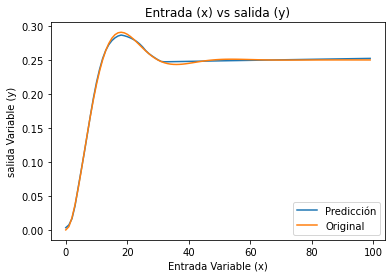

In [21]:
# plot x vs yhat

plt.plot(x_plot,y_p_plot, label='Predicción')


plt.plot(x_plot,y_plot, label='Original')
plt.title('Entrada (x) vs salida (y)')
plt.xlabel('Entrada Variable (x)')
plt.ylabel('salida Variable (y)')

plt.legend()
plt.show()

Como vemos solo hemos logrado que la red neuronal aprenda el comportamiento de la plata solo con una entrada, el objetivo que buscamos es que sea una red neuronal  capaz de predecir el comportamiento de la planta con distintas entradas, por lo tanto, también hay que tomar en cuenta las diez entradas calculadas en el data set y después probar que la red sea capaz de predecir el comportamiento de la entra con cualquier entrada.
Es decir que la red neuronal en lugar de predecir una funcion en 2D sea capaz de recrear una superficie 3D como la vista en el cuaderno "Planta_Data_base"